In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [3]:
# !!! provide your own data directory for final processed csv-tables !!!
data_dir = Path('../data/final/')

df_characters = pd.read_csv(data_dir / 'characters.csv')
df_movies = pd.read_csv(data_dir / 'movies.csv')
df_tropes = pd.read_csv(data_dir / 'tropes.csv')

## Movies

In [4]:
import ast

def extract_genres(genre_str):
    genre_dict = ast.literal_eval(genre_str)
    return list(genre_dict.values())

df_movies['genres_list'] = df_movies['genres'].apply(extract_genres)
df_movies.head()

,wikipedia_movie_id,freebase_movie_id,name,release_date,box_office_revenue,runtime,languages,countries,genres,genres_list
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[Drama]


## Tropes

In [5]:
df_characters.head()

,wikipedia_movie_id,name,trope_id,died,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release
0,5369062,Dr. Kobras,EVIL_OVERLORD,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5369062,Jane Dobson,DAMSEL_IN_DISTRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5369062,Tony Farms (Pumaman),RELUCTANT_HERO,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5369062,Vadinho,MENTOR,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,33663027,Kenny/Sivakumar,TRAGIC_HERO,1.0,NaN,NaN,NaN,NaN,NaN,NaN


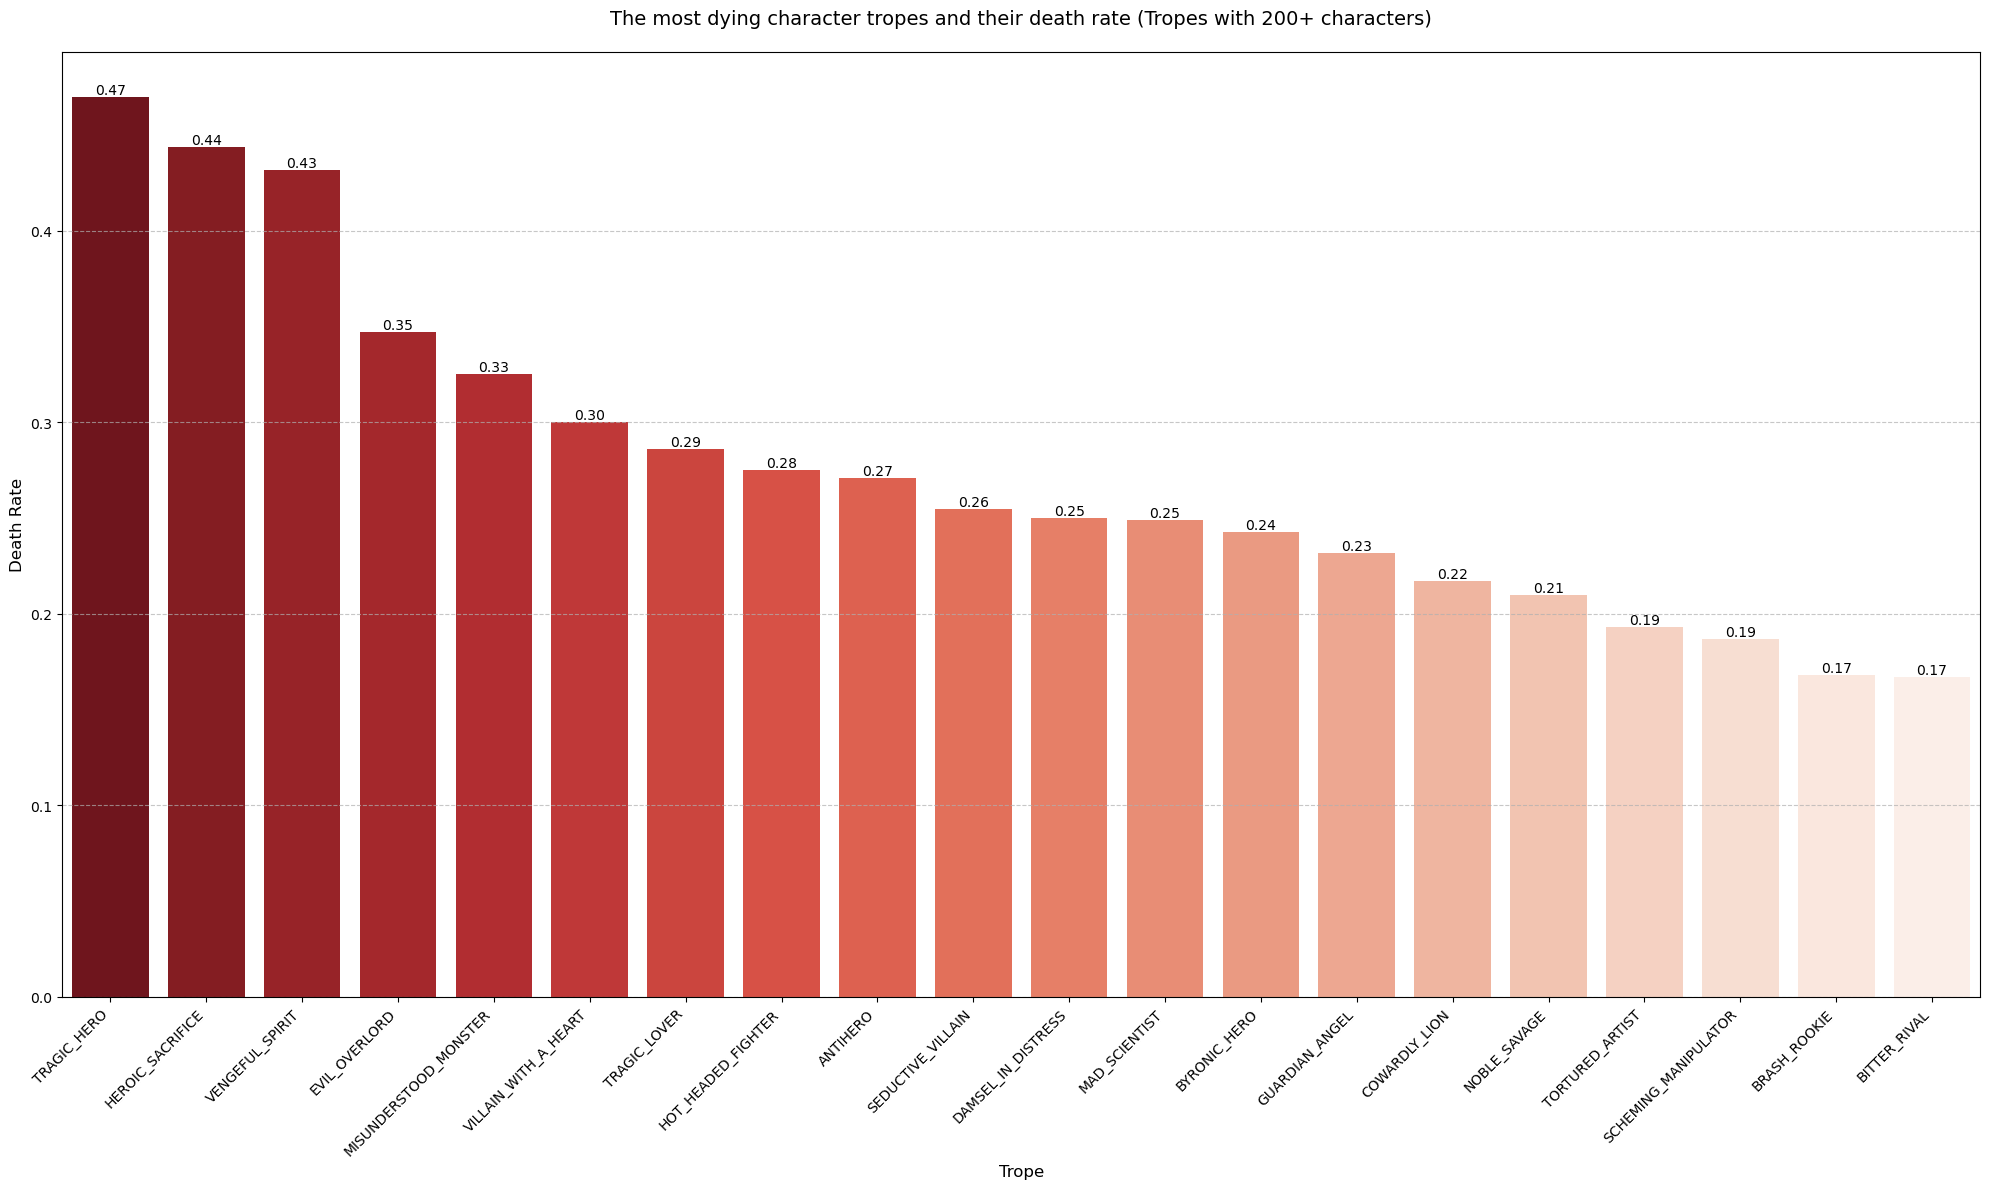


Top 10 "Deadliest" Tropes:
                       total_characters  death_rate
trope_id                                           
TRAGIC_HERO                        7974       0.470
HEROIC_SACRIFICE                    385       0.444
VENGEFUL_SPIRIT                     475       0.432
EVIL_OVERLORD                      9762       0.347
MISUNDERSTOOD_MONSTER              1822       0.325
VILLAIN_WITH_A_HEART               2865       0.300
TRAGIC_LOVER                       1662       0.286
HOT_HEADED_FIGHTER                  444       0.275
ANTIHERO                           1146       0.271
SEDUCTIVE_VILLAIN                   800       0.255

Overall mortality rate: 0.142


In [6]:
mortality_by_trope = df_characters.groupby('trope_id').agg({
    'died': ['count', 'sum', 'mean']
}).round(3)
mortality_by_trope.columns = ['total_characters', 'total_deaths', 'death_rate']

trope_threshold = 200
significant_mortality = mortality_by_trope[mortality_by_trope['total_characters'] >= trope_threshold]
significant_mortality = significant_mortality.sort_values('death_rate', ascending=False)

plt.figure(figsize=(20, 12))

sns.barplot(
    data=significant_mortality[:20].reset_index(),
    x='trope_id',
    y='death_rate',
    palette='Reds_r'
)

plt.title(f'The most dying character tropes and their death rate (Tropes with {trope_threshold}+ characters)', pad=20, fontsize=14)
plt.xlabel('Trope', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(significant_mortality[:20]['death_rate']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

shown_number = 10
print(f'\nTop {shown_number} "Deadliest" Tropes:')
print(significant_mortality[['total_characters', 'death_rate']].head(shown_number).to_string())

print('\nOverall mortality rate:', df_characters['died'].mean().round(3))

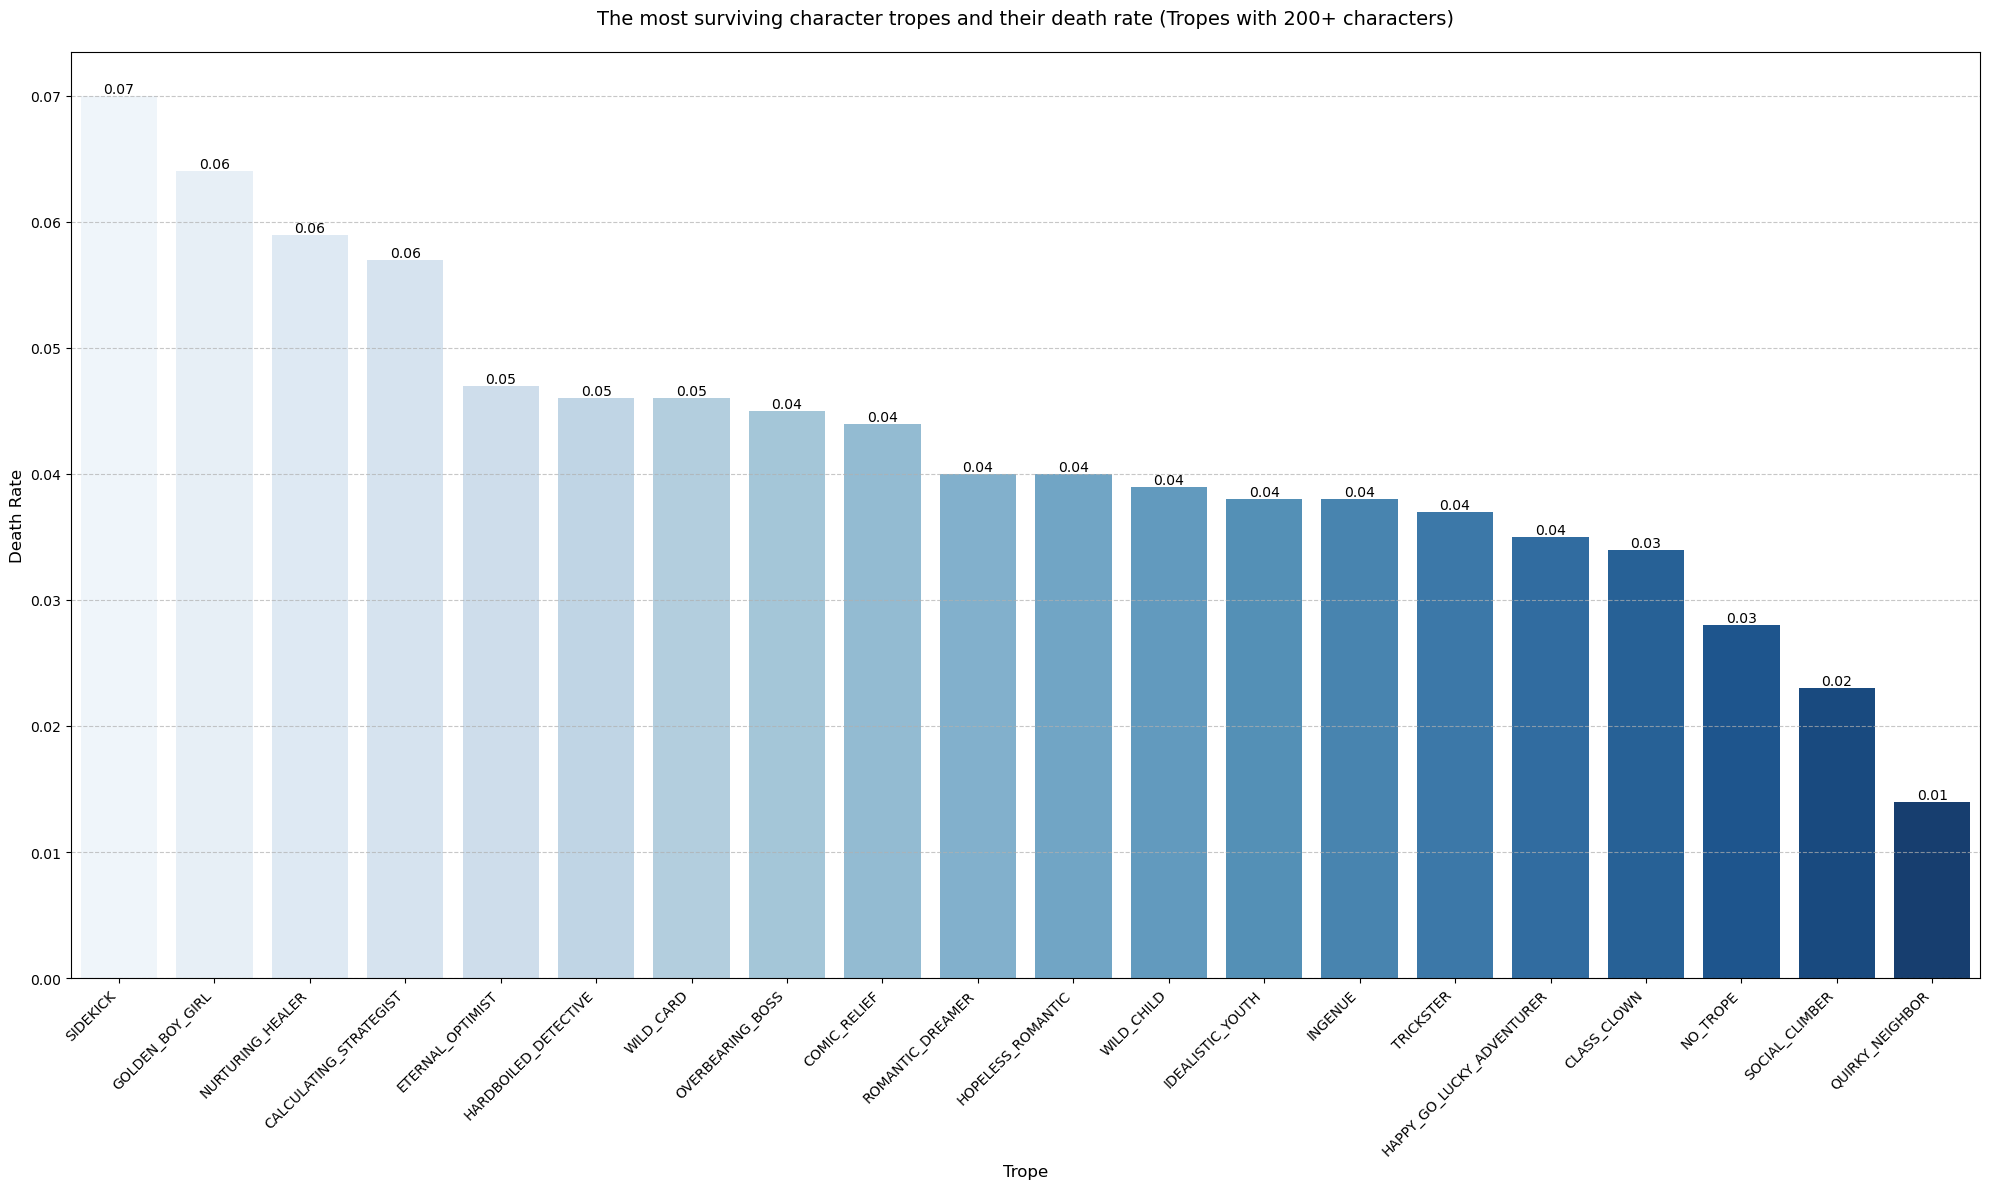


Top 10 "Surviving" character tropes:
                           total_characters  death_rate
trope_id                                               
HOPELESS_ROMANTIC                       619       0.040
WILD_CHILD                              257       0.039
IDEALISTIC_YOUTH                        501       0.038
INGENUE                                4952       0.038
TRICKSTER                               677       0.037
HAPPY_GO_LUCKY_ADVENTURER               489       0.035
CLASS_CLOWN                             232       0.034
NO_TROPE                               8276       0.028
SOCIAL_CLIMBER                          426       0.023
QUIRKY_NEIGHBOR                        1003       0.014

Overall mortality rate: 0.142


In [7]:
plt.figure(figsize=(20, 12))

sns.barplot(
    data=significant_mortality[-20:].reset_index(),
    x='trope_id',
    y='death_rate',
    palette='Blues'
)

plt.title(f'The most surviving character tropes and their death rate (Tropes with {trope_threshold}+ characters)', pad=20, fontsize=14)
plt.xlabel('Trope', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(significant_mortality[-20:]['death_rate']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

shown_number = 10
print(f'\nTop {shown_number} "Surviving" character tropes:')
print(significant_mortality[['total_characters', 'death_rate']].tail(shown_number).to_string())

print('\nOverall mortality rate:', df_characters['died'].mean().round(3))

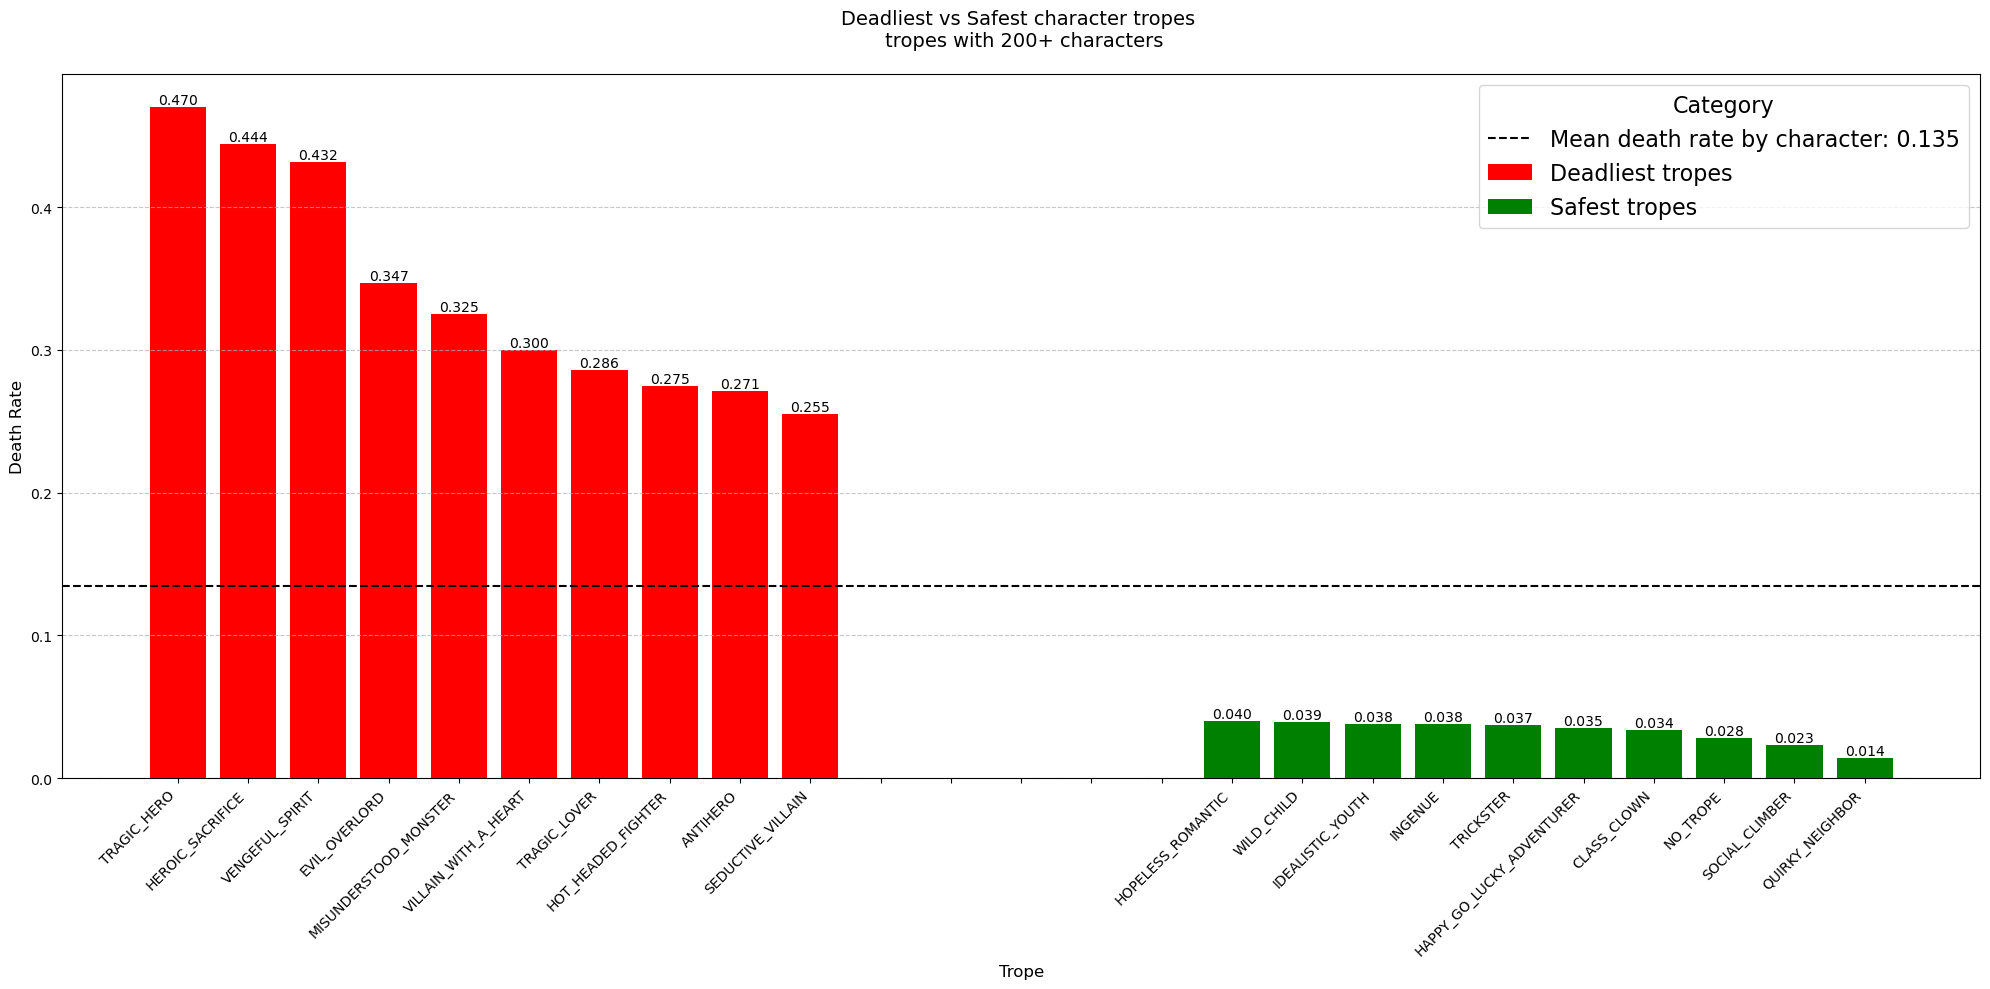


Overall mortality rate: 0.135

Top 10 deadliest character tropes:
                       total_characters  total_deaths  death_rate
trope_id                                                         
TRAGIC_HERO                        7974        3747.0       0.470
HEROIC_SACRIFICE                    385         171.0       0.444
VENGEFUL_SPIRIT                     475         205.0       0.432
EVIL_OVERLORD                      9762        3386.0       0.347
MISUNDERSTOOD_MONSTER              1822         592.0       0.325
VILLAIN_WITH_A_HEART               2865         860.0       0.300
TRAGIC_LOVER                       1662         476.0       0.286
HOT_HEADED_FIGHTER                  444         122.0       0.275
ANTIHERO                           1146         310.0       0.271
SEDUCTIVE_VILLAIN                   800         204.0       0.255

Top 10 safest character tropes:
                           total_characters  total_deaths  death_rate
trope_id                              

In [8]:
mortality_by_trope = df_characters.groupby('trope_id').agg({
    'died': ['count', 'sum', 'mean']
}).round(3)
mortality_by_trope.columns = ['total_characters', 'total_deaths', 'death_rate']

trope_threshold = 200
significant_character_mortality = mortality_by_trope[mortality_by_trope['total_characters'] >= trope_threshold]
significant_character_mortality = significant_character_mortality.sort_values('death_rate', ascending=False)

shown_number = 10
top_ = significant_character_mortality.head(shown_number).reset_index()
bottom_ = significant_character_mortality.tail(shown_number).reset_index()

plt.figure(figsize=(20, 10))

positions = np.concatenate([
    np.arange(shown_number),
    np.arange(shown_number + 5, 2 * shown_number + 5)
])
plt.bar(positions[:shown_number], top_['death_rate'], color='red', label='Deadliest tropes')
plt.bar(positions[shown_number:], bottom_['death_rate'], color='green', label='Safest tropes')

plt.title(f'Deadliest vs Safest character tropes \n tropes with {trope_threshold}+ characters', 
          pad=20, fontsize=14)
plt.xlabel('Trope', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)

mean_death_rate = significant_character_mortality['death_rate'].mean()
plt.axhline(y=mean_death_rate, color='black', linestyle='--', label=f'Mean death rate by character: {mean_death_rate:.3f}')

all_labels = list(top_['trope_id']) + [''] * 5 + list(bottom_['trope_id'])
plt.xticks(np.arange(len(all_labels)), all_labels, rotation=45, ha='right')


for i, v in enumerate(top_['death_rate']):
    plt.text(positions[i], v, f'{v:.3f}', ha='center', va='bottom')    
for i, v in enumerate(bottom_['death_rate']):
    plt.text(positions[i + shown_number], v, f'{v:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Category', fontsize=16, title_fontsize=16)
plt.tight_layout()
plt.show()

print(f'\nOverall mortality rate: {mean_death_rate:.3f}')
print(f'\nTop {shown_number} deadliest character tropes:')
print(significant_character_mortality.head(shown_number).to_string())
print(f'\nTop {shown_number} safest character tropes:')
print(significant_character_mortality.tail(shown_number).to_string())

## Genres

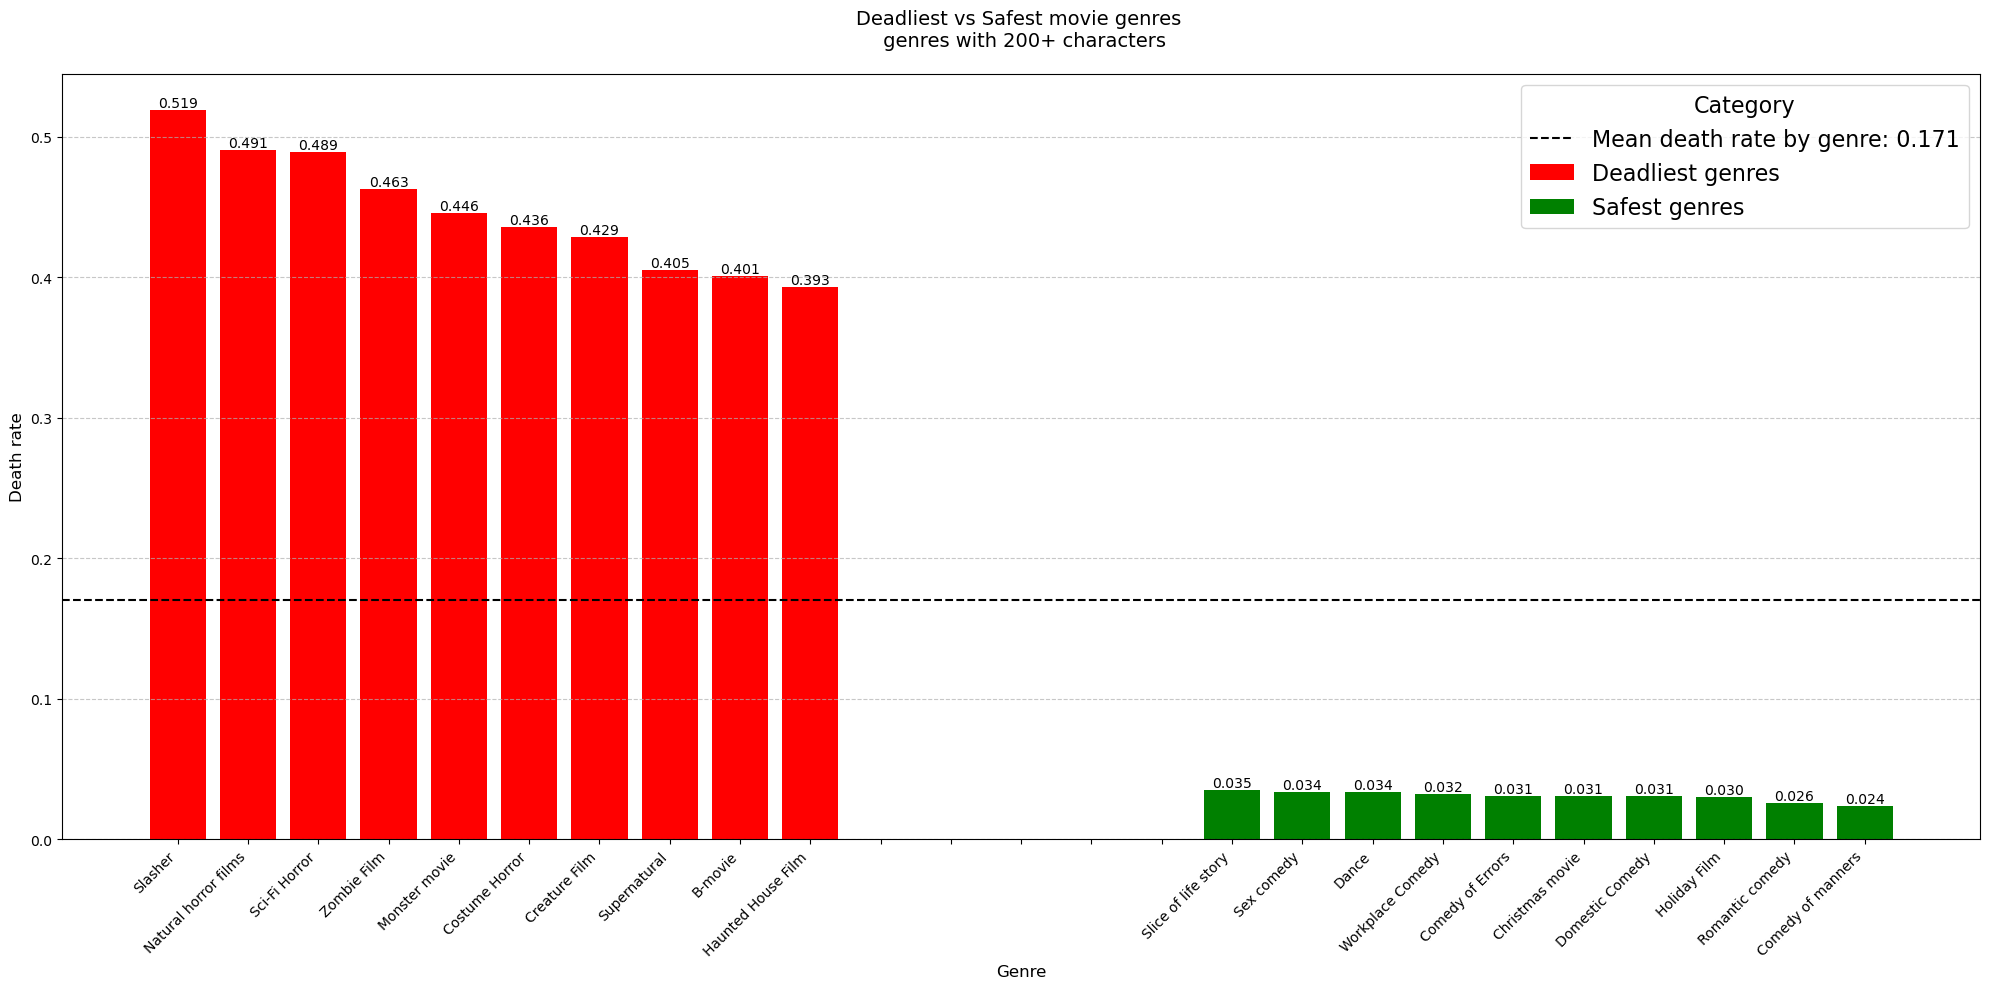


Overall mortality rate: 0.171

Top 10 deadliest genres:
                      total_characters  total_deaths  death_rate
genres_list                                                     
Slasher                           3110        1614.0       0.519
Natural horror films               648         318.0       0.491
Sci-Fi Horror                      593         290.0       0.489
Zombie Film                       1093         506.0       0.463
Monster movie                      717         320.0       0.446
Costume Horror                     250         109.0       0.436
Creature Film                     1542         661.0       0.429
Supernatural                      2808        1136.0       0.405
B-movie                           1438         577.0       0.401
Haunted House Film                 305         120.0       0.393

Top 10 safest genres:
                     total_characters  total_deaths  death_rate
genres_list                                                    
Slice of lif

In [9]:
df_merged = df_characters.merge(df_movies[['wikipedia_movie_id', 'genres_list']], 
                              on='wikipedia_movie_id')

df_exploded = df_merged.explode('genres_list')
mortality_by_genre = df_exploded.groupby('genres_list').agg({
    'died': ['count', 'sum', 'mean']
}).round(3)
mortality_by_genre.columns = ['total_characters', 'total_deaths', 'death_rate']

genre_threshold = 200
significant_genres_mortality = mortality_by_genre[mortality_by_genre['total_characters'] >= genre_threshold]
significant_genres_mortality = significant_genres_mortality.sort_values('death_rate', ascending=False)

shown_number = 10
top_ = significant_genres_mortality.head(shown_number).reset_index()
bottom_ = significant_genres_mortality.tail(shown_number).reset_index()

plt.figure(figsize=(20, 10))
positions = np.concatenate([
    np.arange(shown_number),
    np.arange(shown_number + 5, 2 * shown_number + 5)
])
plt.bar(positions[:shown_number], top_['death_rate'], color='red', label='Deadliest genres')
plt.bar(positions[shown_number:], bottom_['death_rate'], color='green', label='Safest genres')

plt.title(f'Deadliest vs Safest movie genres \n genres with {genre_threshold}+ characters', 
          pad=20, fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Death rate', fontsize=12)

mean_death_rate = significant_genres_mortality['death_rate'].mean()
plt.axhline(y=mean_death_rate, color='black', linestyle='--', label=f'Mean death rate by genre: {mean_death_rate:.3f}')

all_labels = list(top_['genres_list']) + [''] * 5 + list(bottom_['genres_list'])
plt.xticks(np.arange(len(all_labels)), all_labels, rotation=45, ha='right')

for i, v in enumerate(top_['death_rate']):
    plt.text(positions[i], v, f'{v:.3f}', ha='center', va='bottom')    
for i, v in enumerate(bottom_['death_rate']):
    plt.text(positions[i + shown_number], v, f'{v:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Category', fontsize=16, title_fontsize=16)
plt.tight_layout()
plt.show()

print(f'\nOverall mortality rate: {mean_death_rate:.3f}')
print(f'\nTop {shown_number} deadliest genres:')
print(significant_genres_mortality.head(shown_number).to_string())
print(f'\nTop {shown_number} safest genres:')
print(significant_genres_mortality.tail(shown_number).to_string())

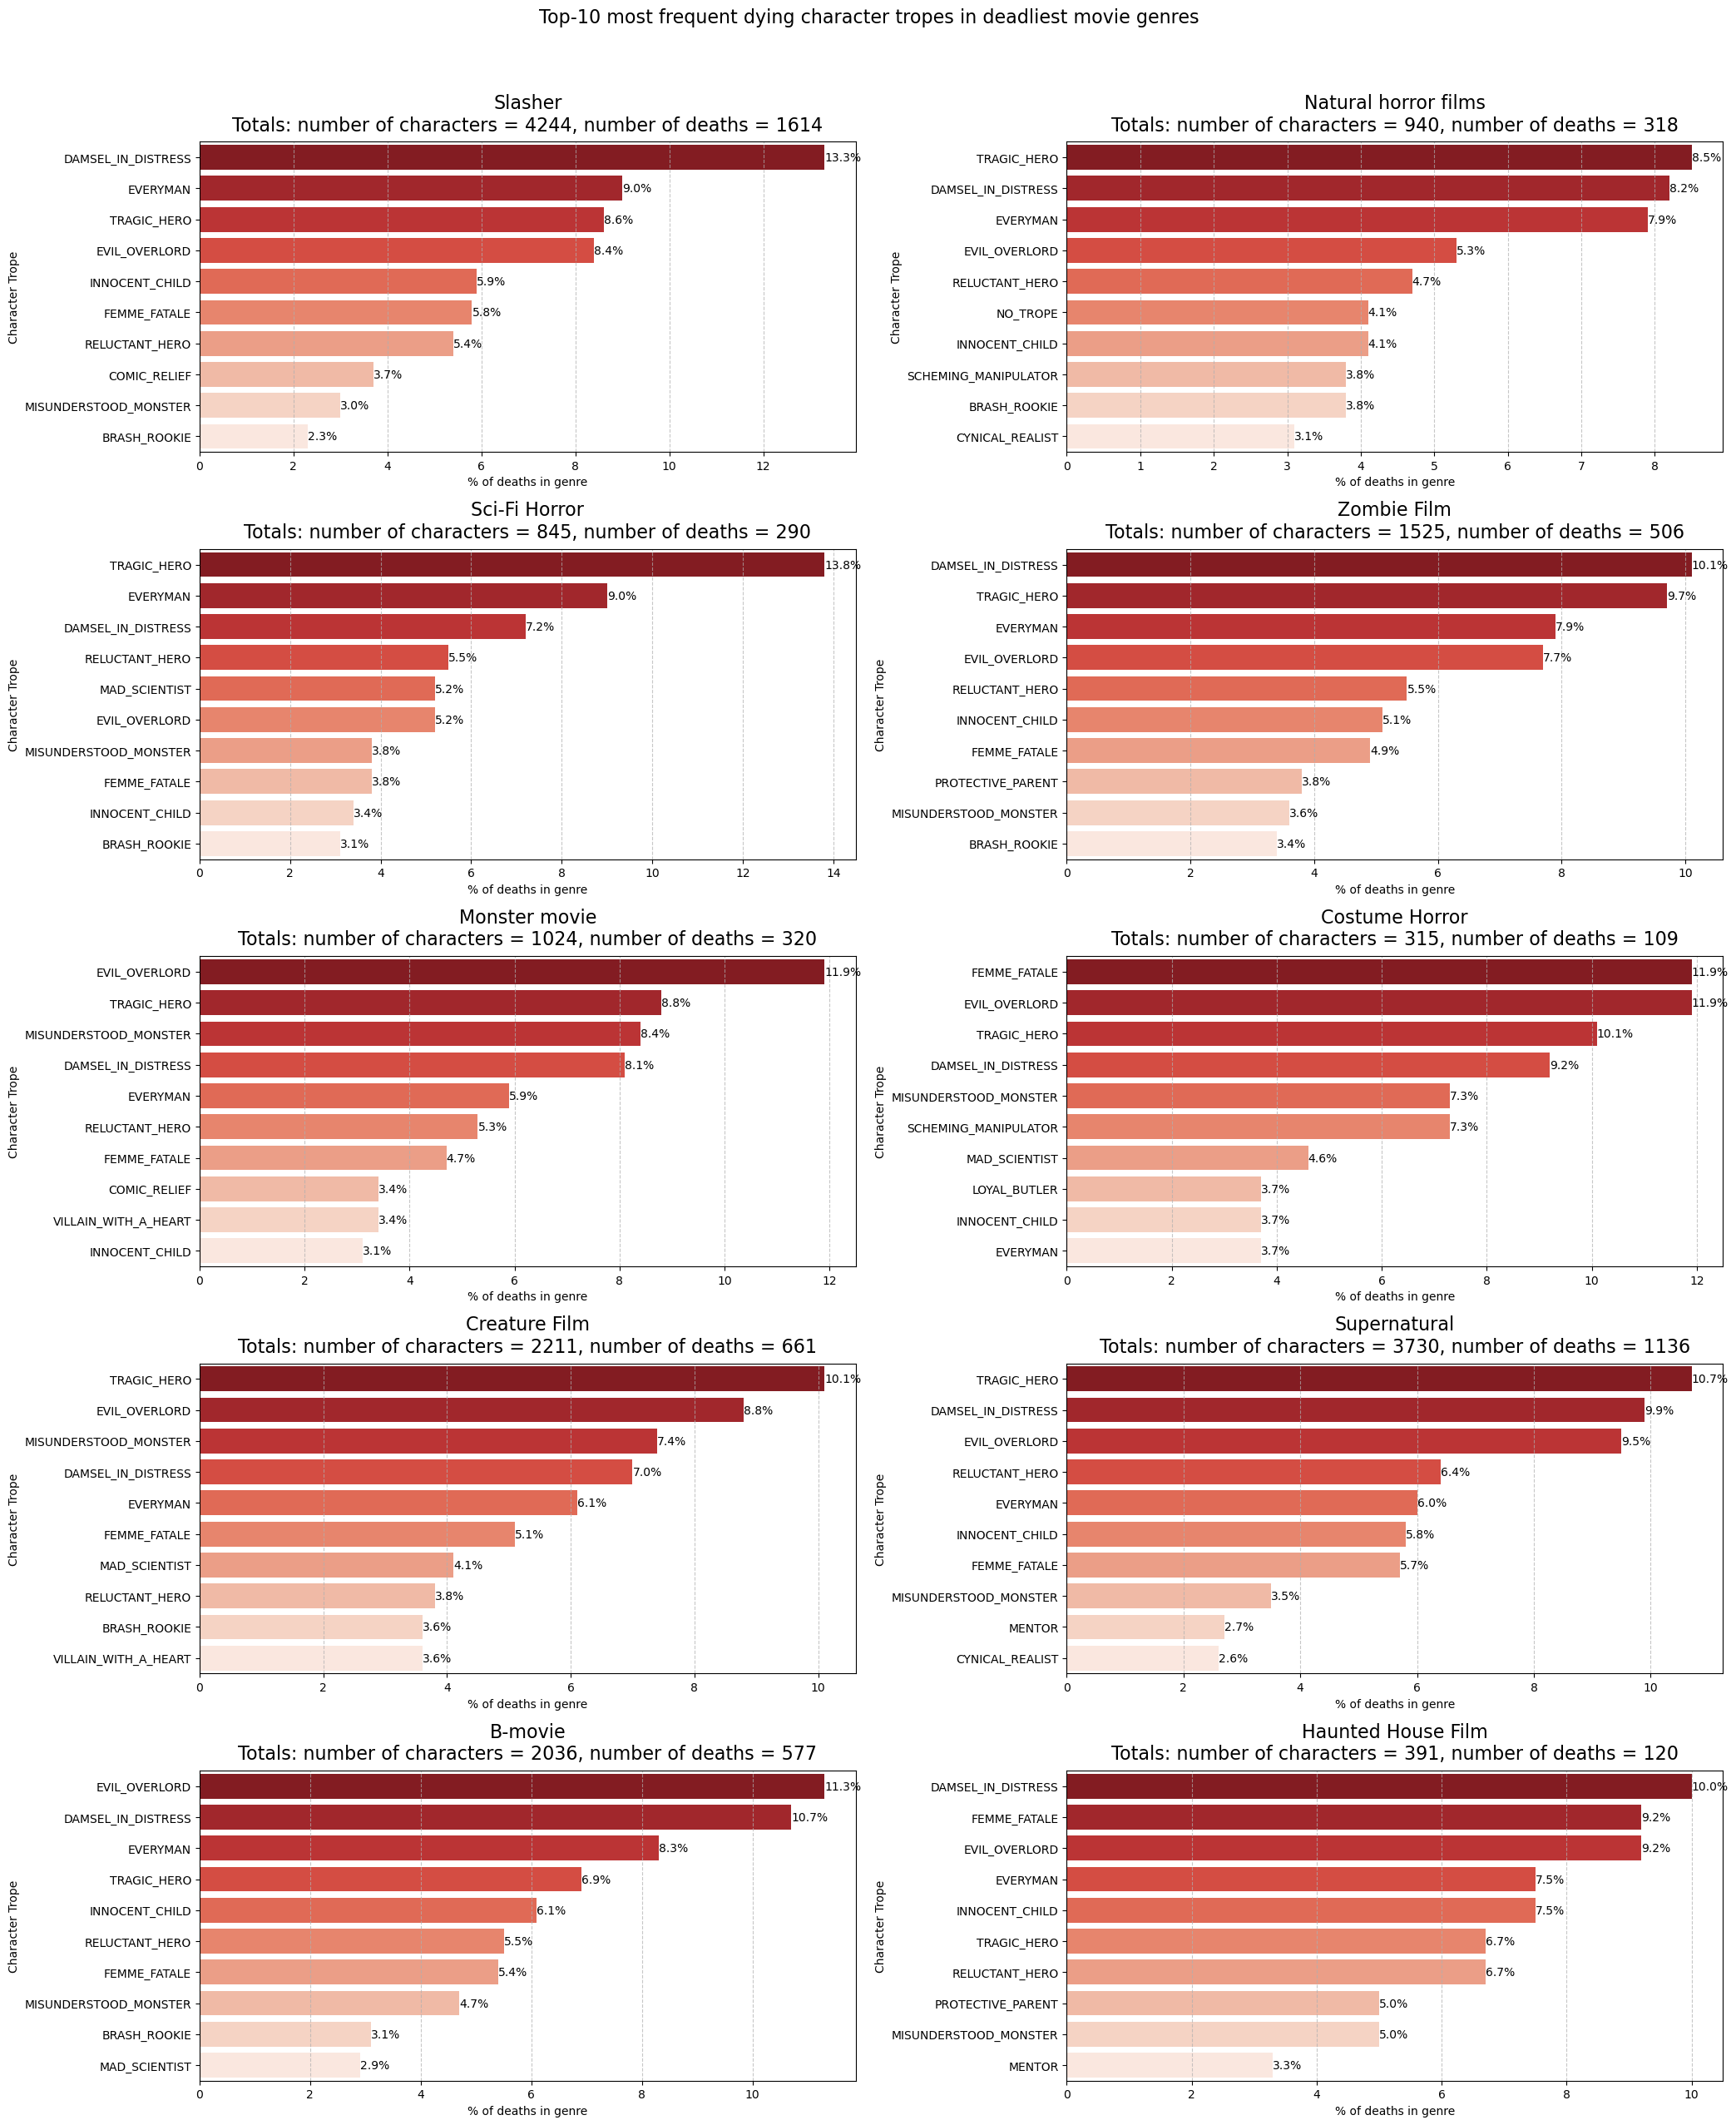


Detailed breakdown of deaths by trope in deadliest movie genres:

Slasher:
Totals: number of characters = 4244, number of deaths = 1614
                       Total characters  Number of deaths  Death rate  \
trope_id                                                                
DAMSEL_IN_DISTRESS                  337               215        63.8   
EVERYMAN                            341               145        42.5   
TRAGIC_HERO                         201               138        68.7   
EVIL_OVERLORD                       315               135        42.9   
INNOCENT_CHILD                      252                96        38.1   
FEMME_FATALE                        204                94        46.1   
RELUCTANT_HERO                      371                87        23.5   
COMIC_RELIEF                        149                60        40.3   
MISUNDERSTOOD_MONSTER               127                48        37.8   
BRASH_ROOKIE                         51                37   

In [11]:
top_deadly_genres = significant_genres_mortality.head(10).index

fig, axes = plt.subplots(5, 2, figsize=(21, 25))
axes = axes.flatten()

for idx, genre in enumerate(top_deadly_genres):
    genre_chars = df_exploded[df_exploded['genres_list'] == genre]
    total_chars = len(genre_chars)

    genre_deaths = df_exploded[
        (df_exploded['genres_list'] == genre) & 
        (df_exploded['died'] == 1.0)
    ]
    
    trope_deaths = genre_deaths['trope_id'].value_counts().head(10)
    
    total_deaths = genre_deaths['trope_id'].count()
    trope_death_pcts = (trope_deaths / total_deaths * 100).round(1)
    
    sns.barplot(
        x=trope_death_pcts.values,
        y=trope_deaths.index,
        ax=axes[idx],
        palette='Reds_r'
    )
    axes[idx].grid(axis='x', linestyle='--', alpha=0.7)
    
    axes[idx].set_title(f'{genre}\nTotals: number of characters = {total_chars}, number of deaths = {total_deaths}', pad=10, fontsize=16)
    axes[idx].set_xlabel('% of deaths in genre')
    axes[idx].set_ylabel('Character Trope')
    
    for i, v in enumerate(trope_death_pcts):
        axes[idx].text(v, i, f'{v}%', va='center')

plt.suptitle('Top-10 most frequent dying character tropes in deadliest movie genres', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print('\nDetailed breakdown of deaths by trope in deadliest movie genres:')
for genre in top_deadly_genres:
    print(f'\n{genre}:')
    genre_chars = df_exploded[df_exploded['genres_list'] == genre]
    total_chars = len(genre_chars)
    
    genre_deaths = genre_chars[genre_chars['died'] == 1.0]
    
    trope_deaths = genre_deaths['trope_id'].value_counts().head(10)
    total_deaths = genre_deaths['trope_id'].count()
    
    trope_totals = genre_chars['trope_id'].value_counts()
    
    stats_df = pd.DataFrame({
        'Total characters': trope_totals[trope_deaths.index],
        'Number of deaths': trope_deaths,
        'Death rate': (trope_deaths / trope_totals[trope_deaths.index] * 100).round(1),
        'Percentage of genre deaths': (trope_deaths / total_deaths * 100).round(1)
    })
    
    print(f'Totals: number of characters = {total_chars}, number of deaths = {total_deaths}')
    print(stats_df)
